<a href="https://colab.research.google.com/github/azrazainol/text-keyword-analysis/blob/main/keyword_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introduction**

Keyword analysis and word frequency analysis are part of Natural Language Processing (NLP), a form of artificial intelligence focusing on natural language which is the human language. Below is the program for keyword analysis and word frequency analysis. The main process consists of:

1. importing txt file(s) for analysis,
2. data cleaning involving removing stopwords and tokenization,
3. extracting keywords using Rake-NLTK,
4. calculating word frequency.

At the end, the program also provides a barplot and donut chart to visualise the frequencies of the keywords.

---
### **Load Packages**
Load all the packages required to do text analysis:

In [ ]:
# Download necessary packages
!pip install rake-nltk
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from rake_nltk import Rake
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Mount google.colab to drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Import necessary .txt files from local files into google.colab:

In [ ]:
from google.colab import files
files.upload()

---

### **Data**

This section allows users to input as many text files and combine them as one for combined text analysis.

the code below defines functions for
1. file selection,
2. file combination (UTF-8), and
3. exporting combined file as "combined_file.txt".

UTF-8 encoding (Unicode Transformation Format - 8-bit) is a standard character format that can represent characters used worldwide. It is important to use UTF-8 so that the program could read text with diverse characters.

In [ ]:
# 1. file selection
def select_files():
    print("Step 1: Select multiple text files.")
    file_paths = input("Enter the paths to the text files (separated by space): ").split()
    return file_paths

In [ ]:
# 2. file combination
# 3. exporting file as "combined_file.txt"
def combine_files(file_paths, output_file):
    with open(output_file, 'w', encoding='utf-8') as output:
        for file_path in file_paths:
            with open(file_path, 'r', encoding='utf-8') as file:
                output.write(file.read() + '\n')

In [ ]:
# run functions for file import/export
files = select_files()
print("\nStep 2: Combining selected files.")
combined_file_path = "combined_file.txt"
combine_files(files, combined_file_path)
print(f"Combined file saved at: {combined_file_path}")
print("\nStep 3: Importing combined file for analysis.")

Step 1: Select multiple text files.
Enter the paths to the text files (separated by space): /content/Charles_Dickens.txt

Step 2: Combining selected files.
Combined file saved at: combined_file.txt

Step 3: Importing combined file for analysis.


In [ ]:
# Check the exported file:
!cat /content/combined_file.txt



---
### **Defining Functions for Word Frequency Analysis**

Define functions for word frequency analysis:

1. read text file,
2. clean text file and tokenize words,
3. remove common words and stopwords (English specific) and count the number of occurence for each word,
4. calculate the frequency of words in the text file,
5. extracting keywords using the Rake-NLTK package.

In [ ]:
# 1. read text file
def read_text_file(file_path = 'combined_file.txt'):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 2. clean text file and tokenize words
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', ' ', text.lower())
    return text

# 3. remove common words and count the number of occurence for each word
# add or remove words from "common_words" depending on the text
def exclude_common_words(word_counts):
    common_words = set(['a', 'the', 'and', 'to', 'from', 'where', 'what', 'was', 'when', 'i', 'you', 'we', 'us', 'me', 'for',
                        'project', 'gutenberg','ebook', 'license'])
    filtered_word_counts = {word: count for word, count in word_counts.items() if word.lower() not in common_words}
    return Counter(filtered_word_counts)

# remove English stopwords and count the number of occurence for each word
def exclude_stop_words(word_counts):
    stop_words = set(stopwords.words('english'))
    filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stop_words}
    return Counter(filtered_word_counts)

# 4. calculate the frequency of words
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

# 5. extract keywords using Rake-NLTK
def extract_keywords(text):
    rake_nltk_var = Rake()
    rake_nltk_var.extract_keywords_from_text(text)
    return rake_nltk_var.get_ranked_phrases()


---

### **Data Cleaning and Tokenization**
First, we clean the text file by removing function words (stopwords) so that the words do not dominate the analysis. Then the words are tokenized which means that the words are given indicators (such as a number) and same words have the same indicator.

In [ ]:
file_path = input("Enter the path to the text file (press Enter for combined_file.txt): ")

if file_path == "":
    text = read_text_file()
else:
    text = read_text_file(file_path)

preprocessed_text = preprocess_text(text)

words = preprocessed_text.split()
word_counts = Counter(words)

filtered_word_counts = exclude_common_words(word_counts)
filtered_words = exclude_stop_words(filtered_word_counts)
word_counts = Counter(filtered_words)

Enter the path to the text file (press Enter for combined_file.txt): 


---
### **Keyword Extraction using Rake-NLTK**
Next, we run the code below to extract a number of keywords from the cleaned text. The default number of keywords to be displayed is 5.

In [ ]:
# Extract keywords using Rake-NLTK
keywords = extract_keywords(preprocessed_text)

# Display Rake-NLTK extracted keywords
no_of_keyword = input("Enter the number of keywords to display (press Enter for default = 5): ")
if no_of_keyword == "" :
  nkey = 5
else :
  nkey = int(no_of_keyword)
print("\nExtracted Keywords using Rake-NLTK:")
for keyword in keywords[:nkey]:
    print("\n____________________________________________________________\n")
    print(keyword)

Enter the number of keywords to display (press Enter for default = 5): 

Extracted Keywords using Rake-NLTK:

____________________________________________________________

teetotums humming tops needle cases pen wipers smelling bottles conversation cards bouquet holders real fruit made artificially dazzling

____________________________________________________________

magnificent kind fowls tongues preserves fruits confectionaries jellies neguses barley sugar temples trifles crackers eat

____________________________________________________________

tambourines books work boxes paint boxes sweetmeat boxes peep show boxes

____________________________________________________________

french polished tables chairs bedsteads wardrobes eight day clocks

____________________________________________________________

cheeses double glo sterman family cheshireman dutchman north wiltshireman


---

The results of the keyword analysis shows almost incoherent text which may be due to the writing style which is creative writing style. However, the keywords of the text seem to indicate a theme of objects used by people in the story. The selected text file is a Christmas story and the keywords could indicate the exchange of gifts for the Christmas celebration and the preparation for Christmas.

The gift exchange and Christmas gift preparation could be interpreted from the first keyword ("... conversation cards bouquet holders ...") and the third keyword ("...work boxes paint boxes sweetmeat boxes...").

The celebration can be seen in the second keyword ("... fruits confectionaries jellies neguses barley sugar ...  eat") and the fifth keyword ("cheeses ... family cheshireman dutchman north wiltshireman").

The fourth keyword ("... tables chairs bedsteads wardrobes...") could indicate a description of someone's home or a place.

The keywords presented are the words that show which the topics are is the most prevalent in the text.



---
### **Word Frequency Analysis**

Next, run the functions for word frequency analysis to retrieve the top 10 most words in the cleaned text. Then input a word to retrieve the word count and percentage.

(the example word chosen for word count is "love")

In [ ]:
top_keywords = word_counts.most_common(10)
total_words_excluding_stop = sum(word_counts.values())

# Display top 10 keywords, their counts, and percentages
print("\nTop 10 Keywords:")
for keyword, count in top_keywords:
    percentage = calculate_percentage(count, total_words_excluding_stop)
    print(f"{keyword}: Count={count}, Percentage={percentage:.2f}%")


Top 10 Keywords:
old: Count=107, Percentage=0.95%
said: Count=93, Percentage=0.83%
one: Count=75, Percentage=0.67%
little: Count=67, Percentage=0.60%
cheeseman: Count=64, Percentage=0.57%
upon: Count=57, Percentage=0.51%
christmas: Count=55, Percentage=0.49%
never: Count=54, Percentage=0.48%
work: Count=51, Percentage=0.45%
time: Count=47, Percentage=0.42%


In [ ]:
# Provide the count of a specific keyword as requested by the user
# eg: love
user_keyword = input("Enter a keyword to get its count (case insensitive): ")
user_keyword_count = word_counts.get(user_keyword.lower(), 0)
user_percentage = calculate_percentage(user_keyword_count, total_words_excluding_stop)
print(f'\nCount of "{user_keyword}": {user_keyword_count}, Percentage: {user_percentage:.3f}%')

Enter a keyword to get its count (case insensitive): love

Count of "love": 14, Percentage: 0.124%




---

From the output above, we can see that the top 10 keywords are old, said, one, little, cheeseman, upon, christmas, never, work and time. The percentages range between 0.95% to 0.42%. These words do not seem to have a specific theme but it may suggest that it is a story about christmas and the daily life of people.

The chosen word to check its count is "love" and it occurs 14 times.




---

### **Data Visualisation**

Next, we plot the top 10 keywords in a barplot to better visualise the counts of the words.


Top 10 Words:
old: Count=107, Percentage=0.95%
said: Count=93, Percentage=0.83%
one: Count=75, Percentage=0.67%
little: Count=67, Percentage=0.60%
cheeseman: Count=64, Percentage=0.57%
upon: Count=57, Percentage=0.51%
christmas: Count=55, Percentage=0.49%
never: Count=54, Percentage=0.48%
work: Count=51, Percentage=0.45%
time: Count=47, Percentage=0.42%


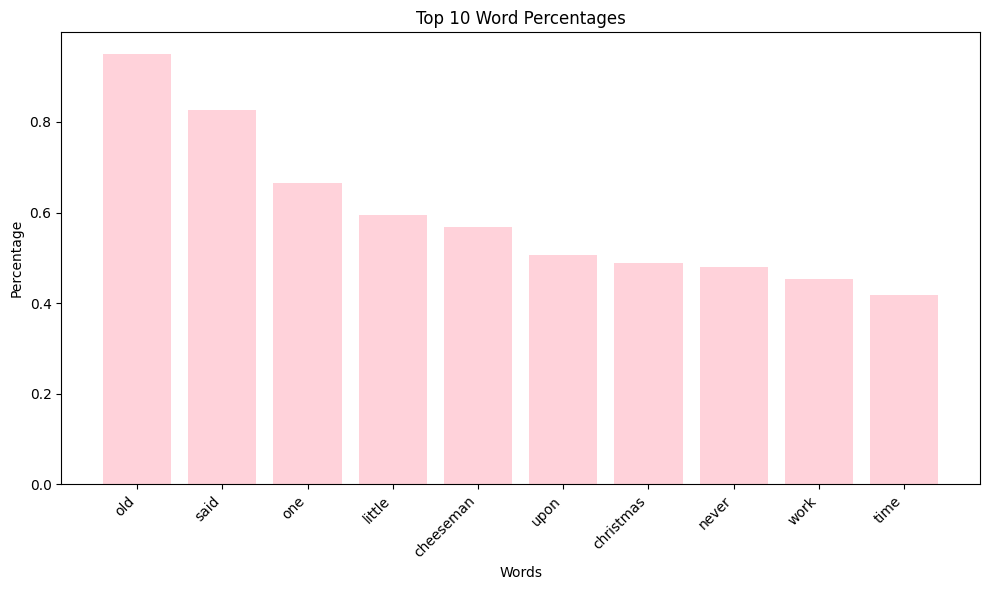

In [ ]:
print("\nTop 10 Words:")
keywords = []
counts = []
percentages = []

for keyword, count in top_keywords:
    percentage = calculate_percentage(count, total_words_excluding_stop)
    print(f"{keyword}: Count={count}, Percentage={percentage:.2f}%")
    keywords.append(keyword)
    counts.append(count)
    percentages.append(percentage)

plt.figure(figsize=(10, 6))
plt.bar(keywords, percentages, color='pink', alpha = 0.7)
plt.xlabel('Words')
plt.ylabel('Percentage')
plt.title('Top 10 Word Percentages')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


Based on the bar plot above, the top three words have evident decrease in frequencies which are about 0.1% decrease consecutively. The frequency change starts declining after the fourth spot. This may indicate that the text heavily uses the words "old" and "said" and that the rest of the words are used almost equally in the text.



---

Next, a donut plot is plotted to see the frequency of the selected word against the rest of the words in the text. The frequency displayed is set to show the percentage with 3 decimal places because the words can have a very low frequency.

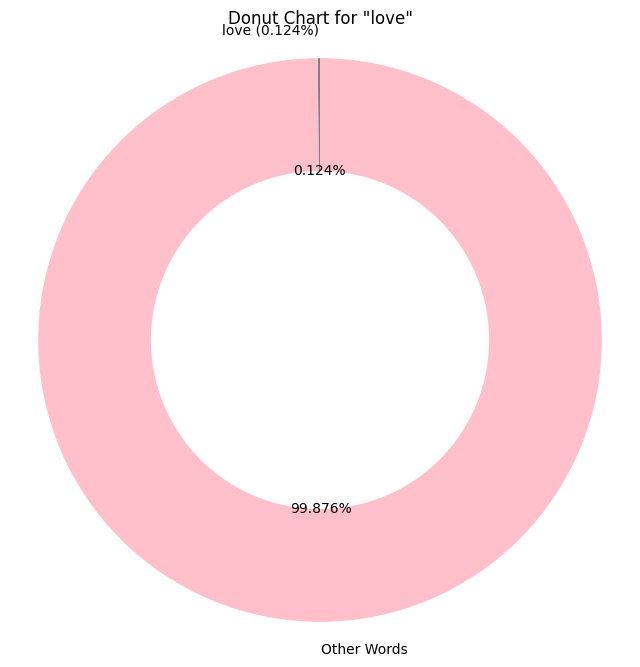

In [ ]:
if user_keyword_count > 0:
    user_keyword_percentage = calculate_percentage(user_keyword_count, total_words_excluding_stop)
    other_words_percentage = 100 - user_keyword_percentage

    labels = [f'{user_keyword} ({user_keyword_percentage:.3f}%)', 'Other Words',]
    sizes = [user_keyword_percentage, other_words_percentage]
    colors = ['gray', 'pink']

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4))
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
    plt.title(f'Donut Chart for "{user_keyword}"')
    plt.show()
else:
    print(f"\n '{user_keyword}' not found in the text.")


The donut chart above shows that the percentage of the word "love" against the rest of the words in the text is 0.124%, indicated by the gray slice in the donut. The word does not occur many times in the text hence it has a pretty low frequency percentage.



---
### **Conclusion**


To conclude, the keyword analysis and the word frequency analysis indicates that "Charles_Dickens.txt" is a story about life and happens during Christmas season.

The program above may be used to carry out keyword and word frequency analysis for other text files and it can provide insights on the content of the text just like the example done on the Charles_Dickens.txt file from Project Gutenberg